In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import pandas as pd
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Count missing values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Drop columns only if they exist
train_data = train_data.drop(columns=[col for col in ['Cabin'] if col in train_data.columns])

# Fill missing values the recommended way
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

Text(0.5, 1.0, 'Survival Count')

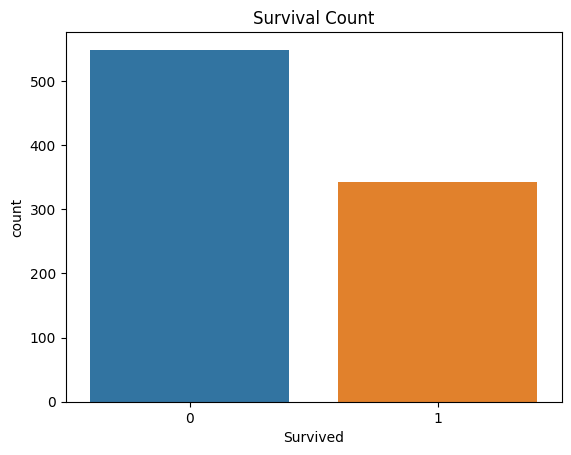

In [5]:
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
# Label Encode 'Sex'
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encode 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [9]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
# Drop columns only if they exist
test_data = test_data.drop(columns=[col for col in ['Cabin'] if col in test_data.columns])

# Fill missing values the recommended way
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mode()[0])

In [11]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [12]:
# Label Encode 'Sex'
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encode 'Embarked'
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

In [13]:
drop_cols = ['Name', 'Ticket', 'PassengerId']

In [14]:
X_train = train_data.drop(columns=['Survived'] + drop_cols)
y_train = train_data['Survived']

X_test = test_data.drop(columns=drop_cols)
passenger_ids = test_data['PassengerId'] 

In [15]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Initialize the model
logreg = LogisticRegression(max_iter=1000)

# Step 2: Train the model
logreg.fit(X_train_split, y_train_split)

# 🔍 Print feature weights (coefficients)
print("\nModel Weights (Feature Coefficients):")
for feature, coef in zip(X_train_split.columns, logreg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# 🔍 Print intercept (bias)
print(f"\nIntercept (bias term): {logreg.intercept_[0]:.4f}")

# Step 3: Predict on validation set
y_pred_logreg = logreg.predict(X_val_split)

# Step 4: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_val_split, y_pred_logreg))

print("\nClassification Report:")
print(classification_report(y_val_split, y_pred_logreg))

print("\nAccuracy:", accuracy_score(y_val_split, y_pred_logreg))



Model Weights (Feature Coefficients):
Pclass: -0.9381
Sex: 2.5903
Age: -0.0306
SibSp: -0.2951
Parch: -0.1078
Fare: 0.0026
Embarked_Q: -0.1123
Embarked_S: -0.3997

Intercept (bias term): 1.9437

Confusion Matrix:
[[90 15]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Accuracy: 0.8100558659217877


In [19]:
y_pred_logreg = logreg.predict(X_test)  # X_test should match test_data shape

submission = pd.DataFrame({
    'PassengerId': passenger_ids,  # 418 entries
    'Survived': y_pred_logreg              # Must also be 418 entries
})

submission.to_csv('output.csv', index=False)


In [20]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
